# Cheap Models

In [1]:
# Copied and pasted from my imports from project 3, 
# delete if we dont need(Aerika)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB, BernoulliNB

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords 

import regex as re

from scipy.stats import ttest_ind

In [ ]:
df = pd.read_csv('../data/data_income_jerry.csv')
df.head()

In [3]:
df.shape

(9652, 13)

In [4]:
df = df.drop(columns='Unnamed: 0')

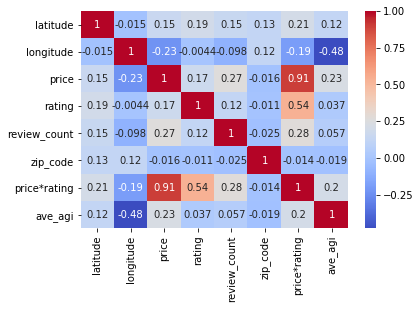

In [5]:
sns.heatmap(df.corr(),
           annot = True,
           cmap = 'coolwarm')

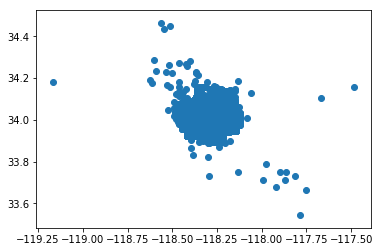

In [6]:
plt.scatter(df['longitude'], df['latitude'])

# KMeans Clustering

In [7]:
df._get_numeric_data()

,latitude,longitude,price,rating,review_count,zip_code,price*rating,ave_agi
0,34.083192,-118.273245,2,4.5,651.0,90026,9.0,44.191297
1,34.078743,-118.263756,1,4.5,3.0,90026,4.5,44.191297
2,34.077049,-118.258873,1,5.0,2.0,90026,5.0,44.191297
3,34.077688,-118.265555,1,4.5,46.0,90026,4.5,44.191297
4,34.077917,-118.263523,1,4.5,74.0,90026,4.5,44.191297
...,...,...,...,...,...,...,...,...
9647,33.990845,-118.460079,3,5.0,6.0,90290,15.0,153.772000
9648,33.822453,-118.301476,3,5.0,3.0,90501,15.0,56.521919
9649,33.893440,-118.352870,1,5.0,20.0,90260,5.0,39.781789
9650,34.127140,-118.059020,2,5.0,30.0,91007,10.0,82.902334


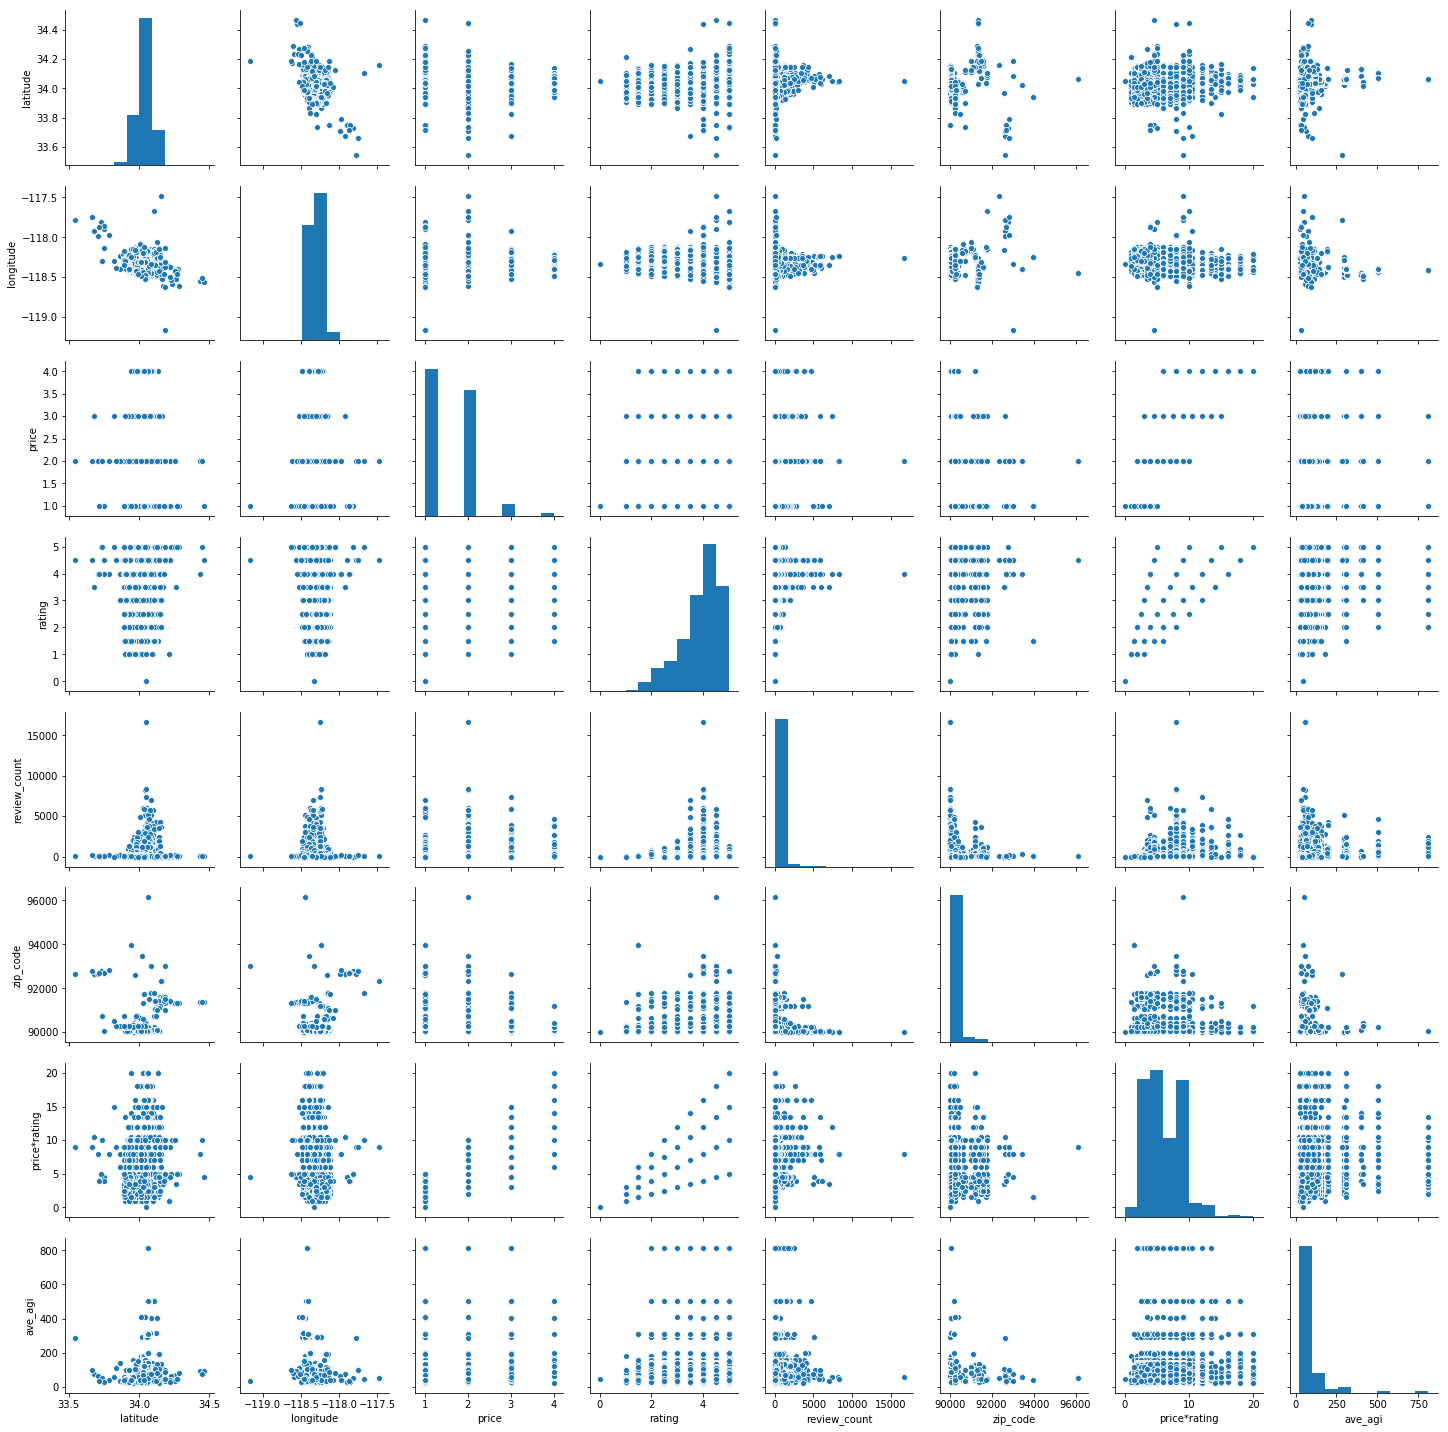

In [8]:
# Try to pick interesting columns for clustering

sns.pairplot(df._get_numeric_data())

In [9]:
# Function to create KMeans Clustering for 2 features from original dataframe

def kmean(var1, var2):
    features = [var1, var2]
    X = df[features]

    sc = StandardScaler()
    X = sc.fit_transform(X)

    km = KMeans(n_clusters=3,
           random_state=42)
    km.fit(X)

    df_copy = df.copy()
    df_copy['cluster'] = km.labels_

    print(f' Cluster Centers: \n{km.cluster_centers_}')

    centroids = pd.DataFrame(
        sc.inverse_transform(km.cluster_centers_),
        columns = features
    )

    print(f' Centroids for Plot: \n{centroids}')


    # Visualizing Clusters
    plt.figure(figsize=(7,7));

    ## Plot scatter by cluster / color, and centroids
    colors = ["red", "green", "blue"]
    df_copy['color'] = df_copy['cluster'].map(lambda p: colors[p])

    ax = df.plot(    
        kind="scatter", 
        x=var1, y=var2,
        figsize=(10,8),
        c = df_copy['color']
    )

    centroids.plot(
        kind="scatter", 
        x=var1, y=var2, 
        marker="*", c=["r", "g", "b"], s=550,
        ax=ax
    );

 Cluster Centers: 
[[-0.95193346  0.99990771]
 [-0.48661846 -1.1805769 ]
 [ 0.69973608  0.20636801]]
 Centroids for Plot: 
    latitude   longitude
0  33.989645 -118.221605
1  34.015333 -118.409781
2  34.080826 -118.290088


<Figure size 504x504 with 0 Axes>

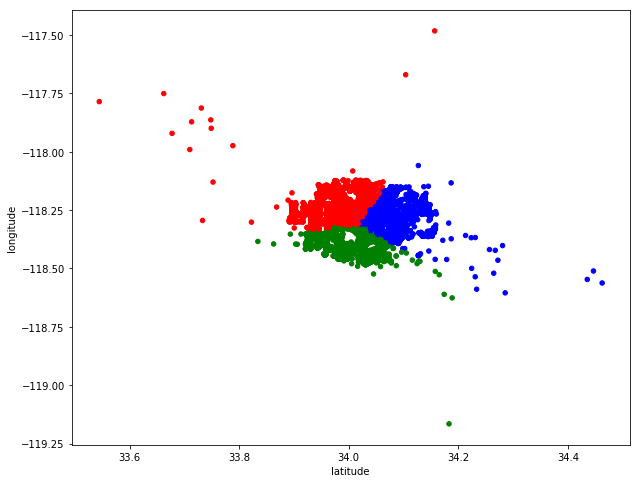

In [10]:
kmean('latitude', 'longitude')

/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


 Cluster Centers: 
[[ 0.69614534 -0.26731272]
 [ 0.64165066  3.95503884]
 [-0.94110805 -0.13091449]]
 Centroids for Plot: 
    longitude      zip_code
0 -118.247820  90059.313078
1 -118.252523  91432.315240
2 -118.389115  90103.666341


<Figure size 504x504 with 0 Axes>

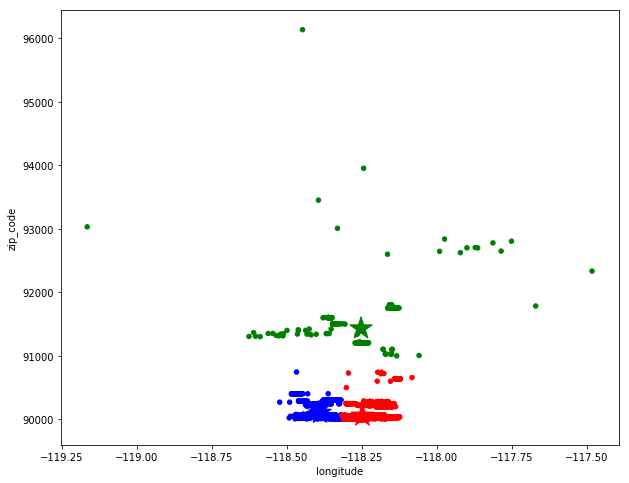

In [11]:
kmean('longitude', 'zip_code')

/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


 Cluster Centers: 
[[ 1.49112571  3.93841115]
 [ 0.4026413  -0.32842552]
 [-1.25043944  0.09222747]]
 Centroids for Plot: 
    latitude      zip_code
0  34.124515  91426.908333
1  34.064425  90039.440738
2  33.973166  90176.226472


<Figure size 504x504 with 0 Axes>

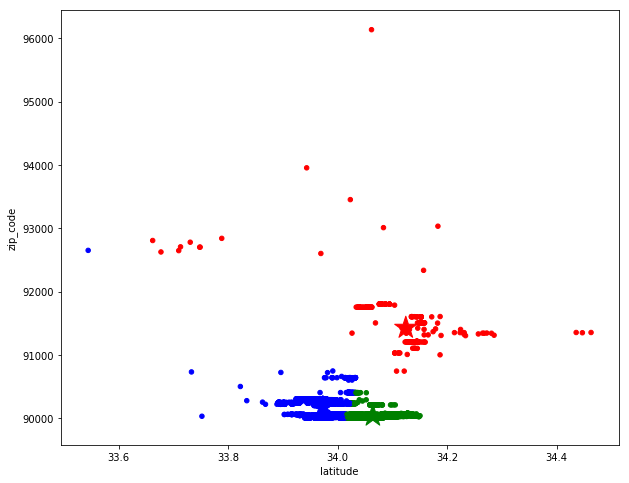

In [12]:
kmean('latitude', 'zip_code')

# Linear Regression Model
- Only price, rating, dummied zip_code as features.
- Target: ave_agi

In [12]:
df['zip_code'] = df['zip_code'].astype(int).astype(str)

In [19]:
df_dummied_city = pd.get_dummies(data=df,columns=['zip_code'])

In [20]:
df_dummied_city._get_numeric_data().head(2)

,latitude,longitude,price,rating,review_count,price*rating,ave_agi,zip_code_90001,zip_code_90002,zip_code_90003,...,zip_code_92703,zip_code_92707,zip_code_92780,zip_code_92807,zip_code_92841,zip_code_93010,zip_code_93033,zip_code_93453,zip_code_93955,zip_code_96137
0,34.083192,-118.273245,2,4.5,651.0,9.0,3.788528,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34.078743,-118.263756,1,4.5,3.0,4.5,3.788528,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
features = df_dummied_city._get_numeric_data().drop(columns=['ave_agi', 'review_count', 'latitude', 'longitude', 'price*rating'])

X = features
y = df_dummied_city['ave_agi']


X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
lr.score(X_train, y_train)

1.0

In [24]:
lr.score(X_test, y_test)

0.2007863602014841

In [25]:
cross_val_score(lr, X_train, y_train, cv = 5).mean()

0.8509835269959876

# Linear Regression Model
- This was really really really bad - Aerika

In [26]:
df_dummied_city = pd.get_dummies(data=df,columns=['city'])

In [27]:
df_dummied_city.head(2)

,alias,category,id,latitude,longitude,price,rating,review_count,zip_code,price*rating,...,city_W. Los Angeles,city_Walnut Park,city_Watts,city_West Hills,city_West Hollywood,city_West Los Angeles,city_Westchester,city_Westwood,city_Woodland Hills,city_los angeles
0,いざかや-おせん-izakaya-osen-los-angeles,"['sushi', 'izakaya', 'seafood']",us0WnDOySVXXXwCqs0AaCw,34.083192,-118.273245,2,4.5,651.0,90026,9.0,...,0,0,0,0,0,0,0,0,0,0
1,yummy-crepe-stand-los-angeles,"['streetvendors', 'creperies']",xFMzCotq4cURN37cvTr9eQ,34.078743,-118.263756,1,4.5,3.0,90026,4.5,...,0,0,0,0,0,0,0,0,0,0


In [28]:
features = df_dummied_city._get_numeric_data().drop(columns=['ave_agi'])

X = features
y = df_dummied_city['ave_agi']


X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
lr.score(X_train, y_train)

0.6706495612683515

In [31]:
lr.score(X_test, y_test)

-5.150497111136115e+23

In [32]:
cross_val_score(lr, X_train, y_train, cv = 5).mean()

-2.134756602045672e+27

Jerry's code from previous project, trying to use it to perform a bunch of different models for this project  
Still need to tweak functions so they can be used for this project.

In [11]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

NameError: name 'master_df' is not defined

In [11]:
# numeric columns that seem like continuous features.
numeric_features = ['price', 'rating', 'review_count', 'ave_agi']

# columns that should get dummied out
categorical_features = ['zip_code']

In [12]:
# transforms numeric columns
# just comment out whichever transformers you want to leave out

numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False, 
                                interaction_only=False)),
    ('power', PowerTransformer()),
#     ('imputer', SimpleImputer(strategy=)),
    ('scaler', StandardScaler())
])

In [13]:
# transforms categorical columns into dummy columns

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [14]:
filter_transformer = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [16]:
# put alias as keys to dictionary
# put instantiation of model, including parameters you don't want to gridsearch, as value

est_dict = {
    'logreg': LogisticRegression(solver='lbfgs'),
    'knn': KNeighborsClassifier(),
    'rand': RandomForestClassifier(n_estimators=100, random_state=111),
    'extra': ExtraTreesClassifier(n_estimators=100, random_state=111),
    'ada': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=111)
}

# list of aliases so we can loop through models
estimators = ['logreg', 'knn', 'rand', 'extra', 'ada']

NameError: name 'LogisticRegression' is not defined

In [17]:
'''
to access parameters, follow this format:

grid_params = {'filter__num__poly__param': [],
    'estimatoralias__param': []
    }
'''

pipe = Pipeline([
    ('filter', filter_transformer),
    ('estimator', Estimator())
])

NameError: name 'Estimator' is not defined